In [13]:
#00. 패키지 호출
import pandas as pd 
import numpy as np 
import warnings 
import datetime
import matplotlib as mpl
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score

#00-1. warning message ignore 
warnings.filterwarnings(action='ignore')

#00-2. 난수씨드값 지정하기.
np.random.seed(2021)

#00-3. 시각화 옵션 설정하기. 
%matplotlib inline

In [14]:
# load data
df = pd.read_csv("C:/폐교/y_staff.csv")
df.head()

,silver_hall,welfare_facil_w,jobforpay,stress,melancholy,poor_60,ratio_old,infra,alone_hh_ratio,welfare_staff
0,515,0.004881,15053.85360,26.0,11.5,23155.860,12.6,438,9.262183,0.999506
1,515,0.004881,15100.35336,26.0,11.5,23227.386,12.6,168,9.262183,0.999506
2,515,0.004881,15154.30728,26.0,11.5,23310.378,12.7,132,9.262183,0.999506
3,515,0.004881,15204.71160,26.0,11.5,23387.910,12.7,508,9.262183,0.999506
4,515,0.004881,15256.89072,26.0,11.5,23468.172,12.7,136,9.262183,0.999506


In [15]:
# 칼럼 확인
df.columns

Index(['silver_hall', 'welfare_facil_w', 'jobforpay', 'stress', 'melancholy',
       'poor_60', 'ratio_old', 'infra', 'alone_hh_ratio', 'welfare_staff'],
      dtype='object')

In [16]:
# 원본 보관 
df_raw = df

In [17]:
df=df[df.columns.difference(['welfare_staff'])]

# EDA

In [18]:
corr_matrix = df.corr()

# 타겟값을 기준으로 관계가 높은 다른 특성들을 정렬해서 역순으로 나열해봅시다.

corr_matrix["alone_hh_ratio"].sort_values(ascending=False)

alone_hh_ratio     1.000000
ratio_old          0.913543
welfare_facil_w    0.505173
stress             0.296866
melancholy         0.101625
infra             -0.034073
silver_hall       -0.275707
jobforpay         -0.574902
poor_60           -0.578672
Name: alone_hh_ratio, dtype: float64

가장 높은 양의 상관관계를 갖는 특성은 복지시설 필요도가 높은 시군구이다. 그 다음으로 고령인구비율, stress 등의 특성이 나열되어 있다.

In [19]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import matplotlib as mpl
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

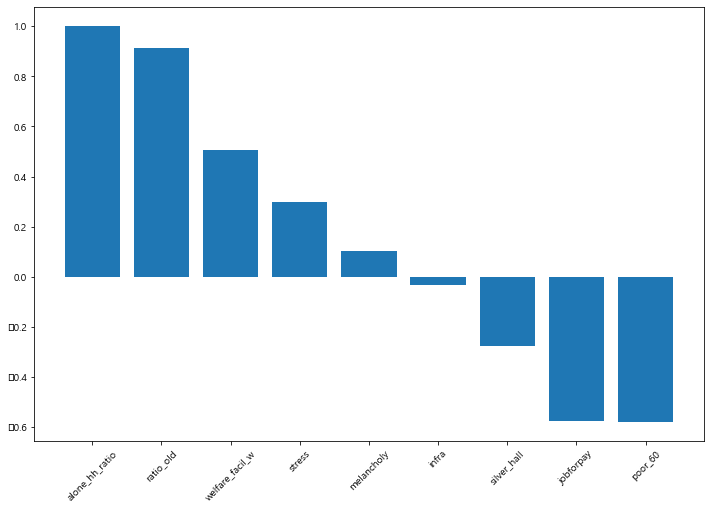

In [20]:
corr_df = pd.DataFrame(corr_matrix["alone_hh_ratio"].sort_values(ascending=False))

plt.figure(figsize=(12,8))
plt.bar(corr_df.index, corr_df["alone_hh_ratio"])
plt.xticks(rotation=45)

array([[<AxesSubplot:xlabel='silver_hall', ylabel='silver_hall'>,
        <AxesSubplot:xlabel='welfare_facil_w', ylabel='silver_hall'>,
        <AxesSubplot:xlabel='jobforpay', ylabel='silver_hall'>,
        <AxesSubplot:xlabel='stress', ylabel='silver_hall'>,
        <AxesSubplot:xlabel='melancholy', ylabel='silver_hall'>,
        <AxesSubplot:xlabel='poor_60', ylabel='silver_hall'>,
        <AxesSubplot:xlabel='ratio_old', ylabel='silver_hall'>,
        <AxesSubplot:xlabel='infra', ylabel='silver_hall'>],
       [<AxesSubplot:xlabel='silver_hall', ylabel='welfare_facil_w'>,
        <AxesSubplot:xlabel='welfare_facil_w', ylabel='welfare_facil_w'>,
        <AxesSubplot:xlabel='jobforpay', ylabel='welfare_facil_w'>,
        <AxesSubplot:xlabel='stress', ylabel='welfare_facil_w'>,
        <AxesSubplot:xlabel='melancholy', ylabel='welfare_facil_w'>,
        <AxesSubplot:xlabel='poor_60', ylabel='welfare_facil_w'>,
        <AxesSubplot:xlabel='ratio_old', ylabel='welfare_facil_w'>,
       

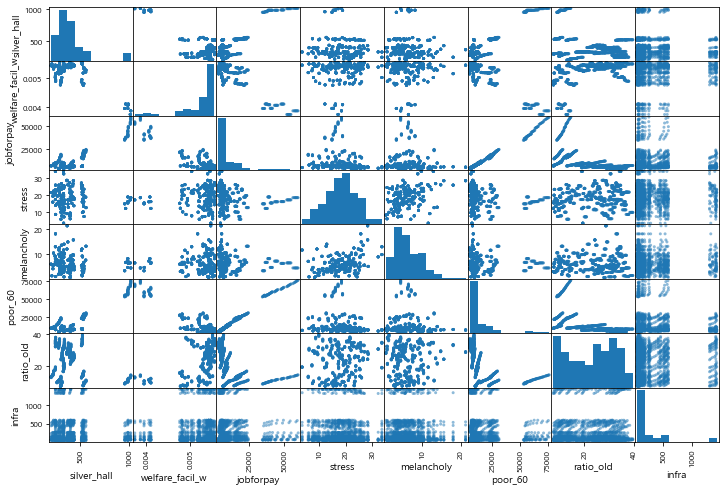

In [21]:
from pandas.plotting import scatter_matrix

attributes = ['silver_hall', 'welfare_facil_w', 'jobforpay', 'stress', 'melancholy', 'poor_60', 'ratio_old', 'infra']
scatter_matrix(df[attributes], figsize=(12, 8))

# 모델링 데이터 준비

In [22]:
from sklearn.model_selection import train_test_split

x = df[['silver_hall', 'welfare_facil_w', 'jobforpay', 'stress', 'melancholy','poor_60', 'ratio_old', 'infra']]
y = df[['alone_hh_ratio']]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1209, 8), (519, 8), (1209, 1), (519, 1))

# 선형 모델링

In [23]:
# 모형 생성
line_fitter = LinearRegression()
line_fitter.fit(x_train, y_train)

LinearRegression()

# 모델 테스트

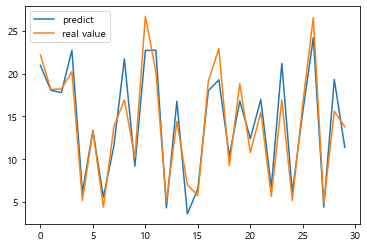

In [24]:
plt.plot(line_fitter.predict(x_test[:30]), label="predict")
plt.plot(y_test[:30].values.reshape(-1, 1), label="real value")
plt.legend()

테스트셋의 x 데이터 30개를 이용해 rent 비용을 예측하고 실제 테스트셋의 y데이터를 확인한 결과 대체적으로 비슷한 결과

전체 test 데이터를 이용해 값을 예측하고 실제 값과 비교하여 산점도를 그려 선형적인 모습인지 확인

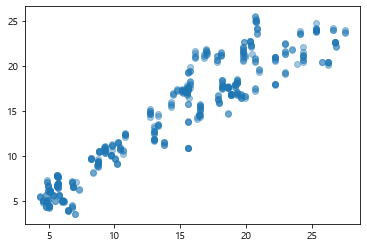

In [25]:
y_predict = line_fitter.predict(x_test)

plt.scatter(y_test, y_predict, alpha = 0.4)
plt.show()

In [31]:
print(line_fitter.score(x_train, y_train))

0.8904468701802349


In [32]:
# 데이터셋 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaling = scaler.fit_transform(df.iloc[:,:-1])
df_scaling = pd.DataFrame(df_scaling, columns=['silver_hall', 'welfare_facil_w', 'jobforpay', 'stress', 'melancholy','poor_60', 'ratio_old', 'infra'])
df_scaling['alone_hh_ratio'] = df.iloc[:,-1].astype('int')
df_scaling

,silver_hall,welfare_facil_w,jobforpay,stress,melancholy,poor_60,ratio_old,infra,alone_hh_ratio
0,0.211273,0.285091,0.208380,0.526829,0.257652,0.158879,0.381188,0.745033,0
1,0.211273,0.088727,0.209202,0.526829,0.258656,0.158879,0.381188,0.745033,0
2,0.211273,0.062545,0.210157,0.526829,0.259821,0.161994,0.381188,0.745033,0
3,0.211273,0.336000,0.211048,0.526829,0.260909,0.161994,0.381188,0.745033,0
4,0.211273,0.065455,0.211971,0.526829,0.262035,0.161994,0.381188,0.745033,0
...,...,...,...,...,...,...,...,...,...
1723,0.712684,0.022545,0.063868,0.039024,0.055565,0.987539,0.393564,0.208609,0
1724,0.712684,0.018909,0.064022,0.039024,0.055721,0.993769,0.393564,0.208609,0
1725,0.712684,0.015273,0.064162,0.039024,0.055862,0.993769,0.393564,0.208609,0
1726,0.712684,0.037818,0.064281,0.039024,0.055983,0.996885,0.393564,0.208609,0


In [33]:
# 결측값 확인
df_scaling.isna().sum()

silver_hall        0
welfare_facil_w    0
jobforpay          0
stress             0
melancholy         0
poor_60            0
ratio_old          0
infra              0
alone_hh_ratio     0
dtype: int64

In [34]:
# 데이터셋 탐색
df_scaling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   silver_hall      1728 non-null   float64
 1   welfare_facil_w  1728 non-null   float64
 2   jobforpay        1728 non-null   float64
 3   stress           1728 non-null   float64
 4   melancholy       1728 non-null   float64
 5   poor_60          1728 non-null   float64
 6   ratio_old        1728 non-null   float64
 7   infra            1728 non-null   float64
 8   alone_hh_ratio   1728 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 114.9 KB


In [35]:
df_scaling.describe()

,silver_hall,welfare_facil_w,jobforpay,stress,melancholy,poor_60,ratio_old,infra,alone_hh_ratio
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.0
mean,0.451629,0.137232,0.119766,0.274932,0.128481,0.479603,0.245514,0.492228,0.0
std,0.285760,0.228601,0.170771,0.172600,0.184507,0.287129,0.206611,0.195562,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.190599,0.018182,0.033638,0.151220,0.036786,0.199377,0.125619,0.367550,0.0
50%,0.485112,0.037455,0.055452,0.243902,0.055050,0.526480,0.182550,0.496689,0.0
75%,0.666889,0.150545,0.114147,0.365854,0.118005,0.738318,0.281869,0.628311,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [36]:
# 파라미터 확인
line_fitter.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [40]:
# GridSearch를 위한 하이퍼파라미터 값 지정하기
params = {
    'n_jobs' : [2,3,4]
}

# GridsearchCV() 메서드를 이용해 훈련 모델 할당하기. 
gscv_model_line = GridSearchCV(line_fitter,param_grid=params, cv=10)

# 모형 학습하기. 
gscv_model_line.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'n_jobs': [2, 3, 4]})

In [41]:
# 최적 하이퍼 파라미터 확인하기. 
gscv_model_line.best_params_

{'n_jobs': 2}

In [42]:
gscv_model_line.best_score_

0.8880259601646324

In [43]:
# test 데이터셋으로 모형 예측 및 평가하기. 
#① R-squared
gscv_model_line_fit = gscv_model_line.best_estimator_
gscv_model_line_pred = gscv_model_line_fit.predict(x_test)
r2_score(y_test,gscv_model_line_pred)

0.8853094009046841

In [25]:
#② RMSE 
mse = mean_squared_error(y_test,gscv_model_elastic_pred)
rmse = np.sqrt(mse)
rmse

8.815517574775773